In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

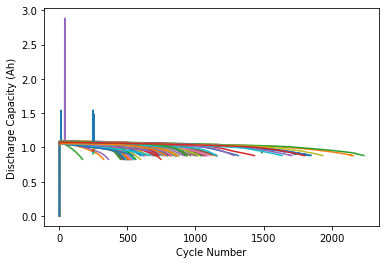

In [2]:
#LoadBatch

batch1 = pickle.load(open(r'C:\Users\satsin\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']
numBat1 = len(batch1.keys())
batch2 = pickle.load(open(r'C:\Users\satsin\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482]
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']
numBat2 = len(batch2.keys())
batch3 = pickle.load(open(r'C:\Users\satsin\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']
numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch1, **batch2, **batch3}
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

#Batch_1 = pd.DataFrame(data=batch1)
#Batch_1.to_excel('summary1.xlsx')
#Batch_2 = pd.DataFrame(data=batch2)
#Batch_2.to_excel('summary2.xlsx')
#Batch_3 = pd.DataFrame(data=batch3)
#Batch_3.to_excel('summary3.xlsx')

test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat)

In [3]:
test_ind

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

In [4]:
train_ind

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

In [5]:
secondary_test_ind

array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

In [6]:
df = pd.DataFrame(bat_dict)

In [7]:
df.head()

,b1c0,b1c1,b1c2,b1c3,b1c4,b1c5,b1c6,b1c7,b1c9,b1c11,...,b3c33,b3c34,b3c35,b3c36,b3c38,b3c39,b3c40,b3c41,b3c44,b3c45
cycle_life,[[1852.0]],[[2160.0]],[[2237.0]],[[1434.0]],[[1709.0]],[[1074.0]],[[636.0]],[[870.0]],[[1054.0]],[[788.0]],...,[[1284.0]],[[1158.0]],[[1093.0]],[[923.0]],[[1935.0]],[[1156.0]],[[796.0]],[[786.0]],[[940.0]],[[1801.0]]
charge_policy,3.6C(80%)-3.6C,3.6C(80%)-3.6C,3.6C(80%)-3.6C,4C(80%)-4C,4C(80%)-4C,4.4C(80%)-4.4C,4.8C(80%)-4.8C,4.8C(80%)-4.8C,5.4C(40%)-3.6C,5.4C(50%)-3C,...,5C(67%)-4C-newstructure,5.3C(54%)-4C-newstructure,5.6C(19%)-4.6C-newstructure,5.6C(36%)-4.3C-newstructure,5C(67%)-4C-newstructure,5.3C(54%)-4C-newstructure,5.6C(19%)-4.6C-newstructure,5.6C(36%)-4.3C-newstructure,5.3C(54%)-4C-newstructure,4.8C(80%)-4.8C-newstructure
summary,"{'IR': [0.0, 0.016742354, 0.016724309, 0.01668...","{'IR': [0.0, 0.017038831, 0.017009802, 0.01692...","{'IR': [0.0, 0.01686798, 0.016831938, 0.016718...","{'IR': [0.0, 0.016369704, 0.016315572, 0.01632...","{'IR': [0.0, 0.016787428, 0.016740341, 0.01673...","{'IR': [0.0, 0.016437579, 0.016396422, 0.01636...","{'IR': [0.0, 0.017001977, 0.016977131, 0.01693...","{'IR': [0.0, 0.016311171, 0.016267659, 0.01623...","{'IR': [0.0, 0.016978227, 0.01692898, 0.016933...","{'IR': [0.0, 0.016575078, 0.016582273, 0.01658...",...,"{'IR': [0.015608473, 0.015511206, 0.015512635,...","{'IR': [0.01546871, 0.015438841, 0.015394062, ...","{'IR': [0.015503207, 0.01549053, 0.015479395, ...","{'IR': [0.015283138, 0.015267849, 0.015275053,...","{'IR': [0.016009804, 0.015988033, 0.015961975,...","{'IR': [0.015740374, 0.015740704, 0.015716039,...","{'IR': [0.015553804, 0.015561919, 0.015549388,...","{'IR': [0.018552294, 0.01854171, 0.018510165, ...","{'IR': [0.015744392, 0.015722955, 0.015682839,...","{'IR': [0.015778109, 0.015742011, 0.015711647,..."
cycles,"{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...",...,"{'0': {'I': [0.4446896636363636, 0.74768759999...","{'0': {'I': [0.36538210909090907, 0.6768590727...","{'0': {'I': [0.28115359090909087, 0.6164724181...","{'0': {'I': [0.33352591818181815, 0.7284268454...","{'0': {'I': [0.2911827818181818, 0.54510636363...","{'0': {'I': [0.42202342727272724, 0.5800594, 0...","{'0': {'I': [0.2727786, 0.6122276999999999, 0....","{'0': {'I': [0.3870253090909091, 0.72554848181...","{'0': {'I': [0.4198421090909091, 0.68663163636...","{'0': {'I': [0.5633510272727271, 0.82326021818..."


In [44]:
temp = []
for i in list(df):
    cell = pd.DataFrame(df[i])
    cell_1 = cell.transpose()
    df3 = pd.DataFrame(cell_1['summary'][i])
    #Qd_cycle_2.append(df3['Tavg'][1])
    temp.append(np.mean(df3['Tavg']))
temp_1 = temp
# Feature_1 = pd.DataFrame(Qd_cycle_2_1,columns = ['Qd_Cycle_2'])
# Feature_1['Qd_max-2']=Qd_max_2_1
# Feature_1.head()

In [42]:
temp_1

[32.00703733489894,
 31.824456797805105,
 31.977366830066675,
 30.114149991717976,
 31.848144025408278,
 32.03029620243009,
 33.0544165508778,
 32.85809248008958,
 33.356759290661564,
 33.61389531472774,
 33.3720015063603,
 34.15097238625349,
 33.65095435334261,
 33.412106616965225,
 33.07868812710668,
 33.91691283601226,
 33.04858361267071,
 34.119044191102674,
 33.080239550413474,
 34.35438249733527,
 35.069132305173895,
 34.1384723613478,
 35.07073578263211,
 35.072007423979166,
 33.77307795555799,
 34.562515374928196,
 30.941500157218965,
 34.0313892651369,
 34.83171930897458,
 33.707997924437315,
 33.10489721682748,
 32.871935287768316,
 33.957043311652406,
 34.90478247983454,
 34.5822715788098,
 34.35133051517806,
 33.865140212097735,
 34.7546822574794,
 34.473810300445756,
 33.51637955052542,
 34.20299881559698,
 30.300686948198116,
 32.68398344115962,
 33.464102898651966,
 34.206776252885014,
 33.687716265546484,
 32.6994743838566,
 32.930088953903294,
 33.5171543750661,
 34.01

In [8]:
#Variance for all the cell 
for i in list(df):
    b2c22 = pd.DataFrame(df[i])
    b2c22_1 = b2c22.transpose()
    b2c22_2 = pd.DataFrame.from_dict({(j,k): b2c22_1['cycles'][j][k] 
                       for j in b2c22_1['cycles'].keys() 
                       for k in b2c22_1['cycles'][i].keys()},
                   orient='index')
    Qdlin = b2c22_2['Qdlin'][99]-b2c22_2['Qdlin'][9]
    Qdlin1 = pd.DataFrame(Qdlin)
    Cycle = pd.DataFrame(b2c22_1['cycle_life'][0])
    Charge_policy = pd.DataFrame(b2c22_1['charge_policy'])
    variance =np.var(Qdlin1)
    temp = pd.DataFrame(np.mean())
    print(Cycle,Charge_policy,'%.12f'%variance)
    #pd.to_csv('C:\\Users\\satsin\\Desktop\\Battery life\Cycle,np.var(Qdlin1))#,np.mean(Qdlin1))

        0
0  1852.0        charge_policy
b1c0  3.6C(80%)-3.6C 0.000009663600
        0
0  2160.0        charge_policy
b1c1  3.6C(80%)-3.6C 0.000009683679
        0
0  2237.0        charge_policy
b1c2  3.6C(80%)-3.6C 0.000018323155
        0
0  1434.0      charge_policy
b1c3    4C(80%)-4C 0.000036089980
        0
0  1709.0      charge_policy
b1c4    4C(80%)-4C 0.000022503825
        0
0  1074.0        charge_policy
b1c5  4.4C(80%)-4.4C 0.000066240261
       0
0  636.0        charge_policy
b1c6  4.8C(80%)-4.8C 0.000170263713
       0
0  870.0        charge_policy
b1c7  4.8C(80%)-4.8C 0.000153643405
        0
0  1054.0        charge_policy
b1c9  5.4C(40%)-3.6C 0.000087220048
       0
0  788.0       charge_policy
b1c11  5.4C(50%)-3C 0.000071302289
       0
0  880.0       charge_policy
b1c14  5.4C(60%)-3C 0.000089935294
       0
0  719.0       charge_policy
b1c15  5.4C(60%)-3C 0.000095951307
       0
0  862.0         charge_policy
b1c16  5.4C(60%)-3.6C 0.000079540135
       0
0  857.0      

       0
0  989.0                    charge_policy
b3c25  5.3C(54%)-4C-newstructure 0.000071357439
        0
0  1028.0                      charge_policy
b3c26  5.6C(19%)-4.6C-newstructure 0.000060324341
       0
0  850.0                      charge_policy
b3c27  5.6C(36%)-4.3C-newstructure 0.000074108443
       0
0  541.0                      charge_policy
b3c28  3.7C(31%)-5.9C-newstructure 0.000353461493
       0
0  858.0                      charge_policy
b3c29  5.9C(15%)-4.6C-newstructure 0.000086382128
       0
0  935.0                    charge_policy
b3c30  5.3C(54%)-4C-newstructure 0.000079391581
       0
0  731.0                      charge_policy
b3c31  5.9C(60%)-3.1C-newstructure 0.000144676160
        0
0  1284.0                  charge_policy
b3c33  5C(67%)-4C-newstructure 0.000040188488
        0
0  1158.0                    charge_policy
b3c34  5.3C(54%)-4C-newstructure 0.000049469839
        0
0  1093.0                      charge_policy
b3c35  5.6C(19%)-4.6C-newstructu

In [3]:
plot = pd.read_excel('C:/Users/satsin/Desktop/Battery life/extracted files/Batch1.xlsx',sheet_name ='Sheet4')

In [4]:
plot.head()

,Cell_No,Charge_Policy,Variance(Qdlin),Cycle,log(Variance),harge_Poliy,Unnamed: 6,Unnamed: 7,Unnamed: 8,Avg Charge Policy,Temp_Avg,log(cycle)
0,b2c0,1C(4%)-6C,0.001796,300,-2.745713,1.0,0.04,6.00,0.96,5.800,32.007037,2.477121
1,b2c1,2C(10%)-6C,0.001875,148,-2.726901,2.0,0.10,6.00,0.90,5.600,31.824457,2.170262
2,b2c2,2C(2%)-5C,0.000321,438,-3.493259,2.0,0.02,5.00,0.98,4.940,31.977367,2.641474
3,b2c3,2C(7%)-5.5C,0.001176,335,-2.929546,2.0,0.07,5.50,0.93,5.255,30.114150,2.525045
4,b2c5,3.6C(2%)-4.85C,0.000250,480,-3.602695,3.6,0.02,4.85,0.98,4.825,31.848144,2.681241


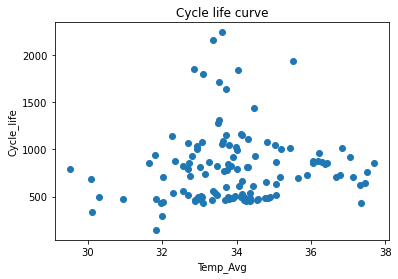

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter((plot['Temp_Avg']),plot['Cycle'])
plt.xlabel('Temp_Avg')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve')
plt.show()

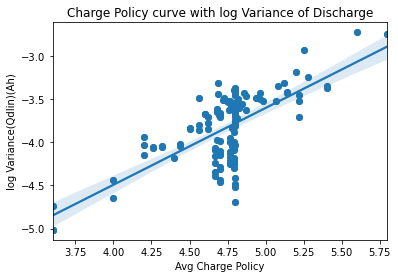

In [7]:
plt.scatter((plot['Avg Charge Policy']),plot['log(Variance)'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((plot['Avg Charge Policy']),plot['log(Variance)'])
plt.xlabel('Avg Charge Policy')
plt.ylabel('log Variance(Qdlin)(Ah)')
plt.title('Charge Policy curve with log Variance of Discharge')
plt.show()

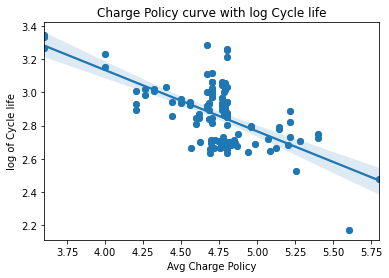

In [8]:
plt.scatter((plot['Avg Charge Policy']),plot['log(cycle)'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((plot['Avg Charge Policy']),plot['log(cycle)'])
plt.xlabel('Avg Charge Policy')
plt.ylabel('log of Cycle life')
plt.title('Charge Policy curve with log Cycle life')
plt.show()

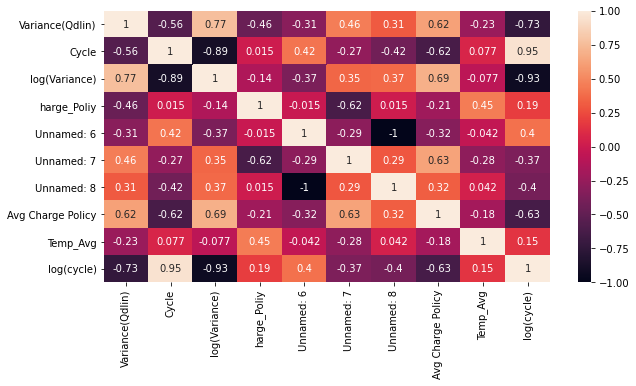

In [10]:
Final_1 = plot_1.corr()
plt.figure(figsize=(10,5))
sns.heatmap(Final_1, annot=True)
plt.show()

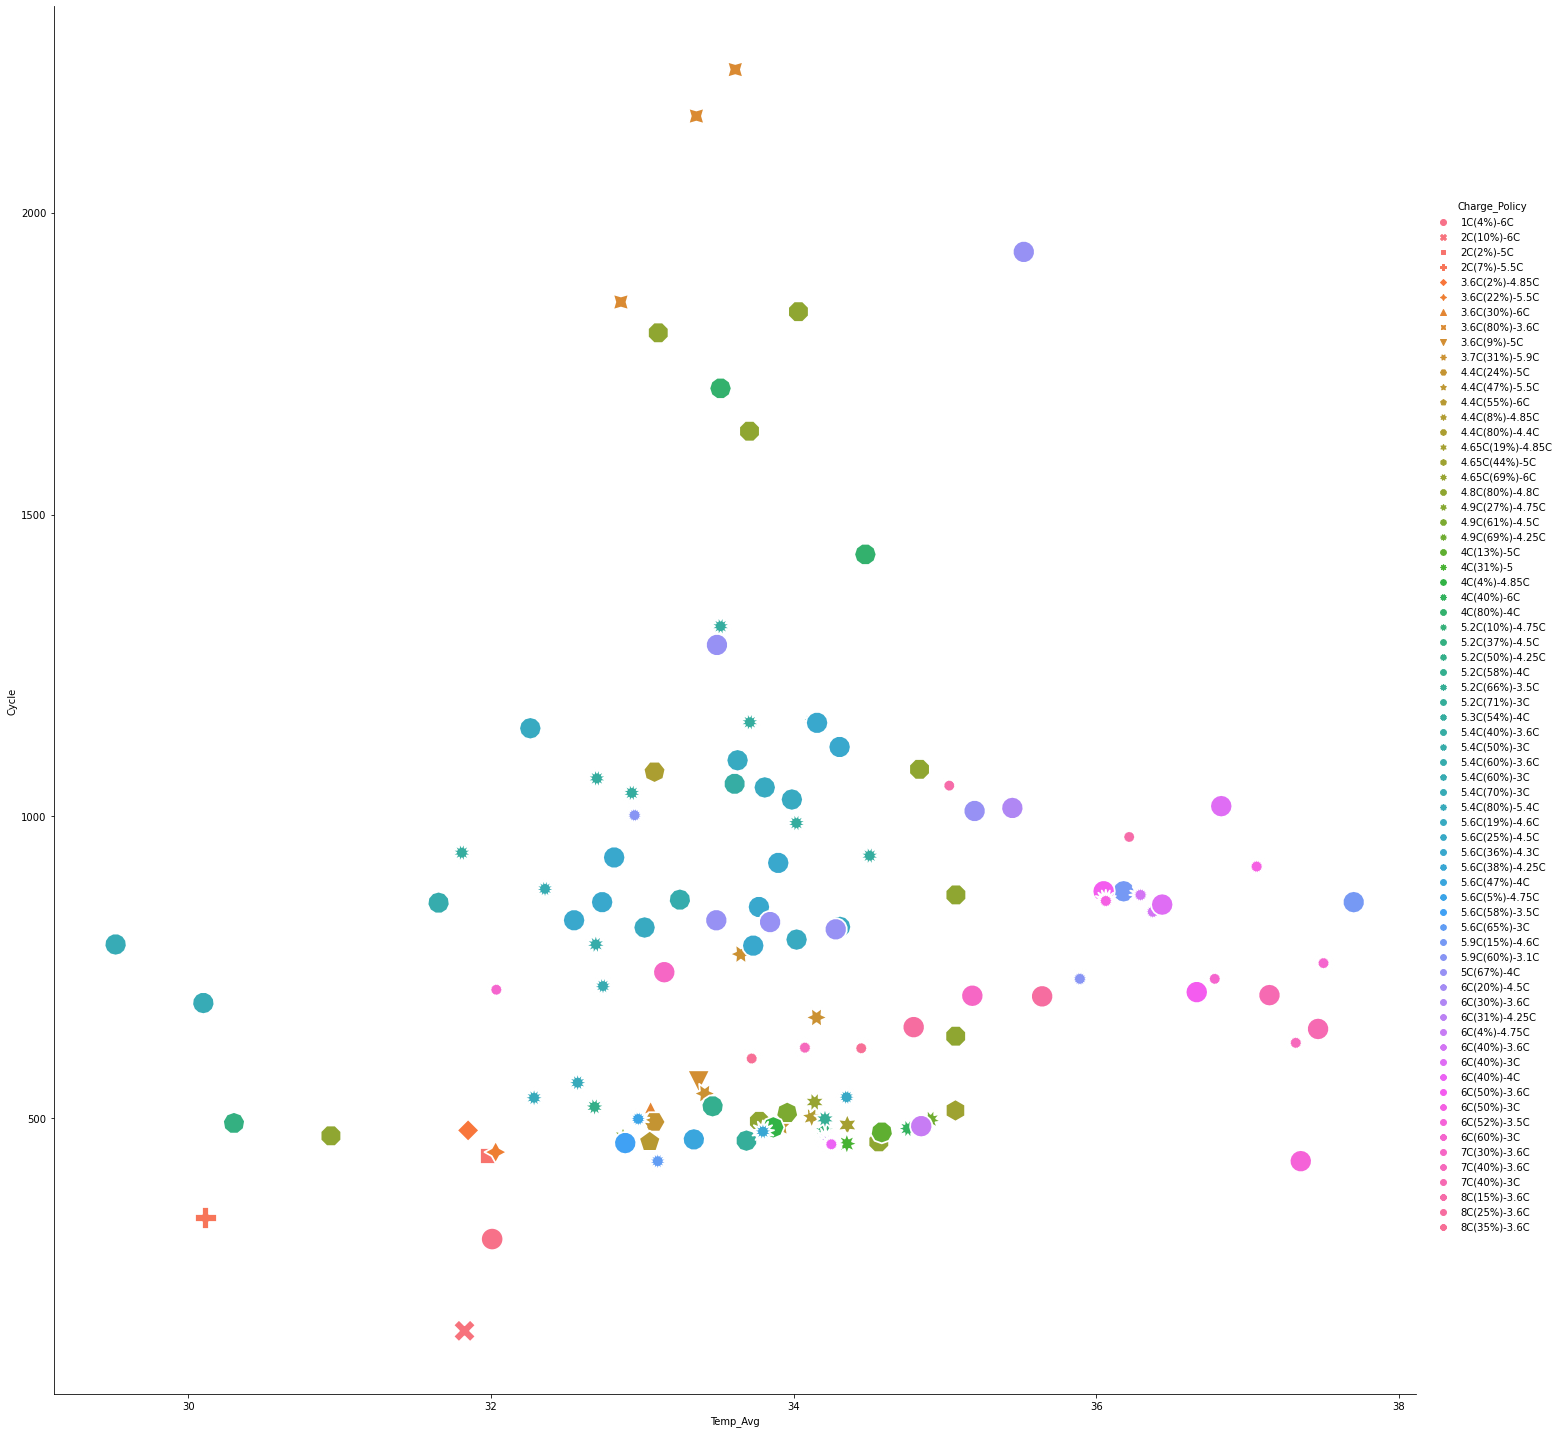

In [17]:
sns.relplot(x=plot["Temp_Avg"], y=plot["Cycle"],
            hue=plot["Charge_Policy"],data=plot,style =plot["Charge_Policy"],height=20,s=500);
plt.savefig("temp_avg.jpg")

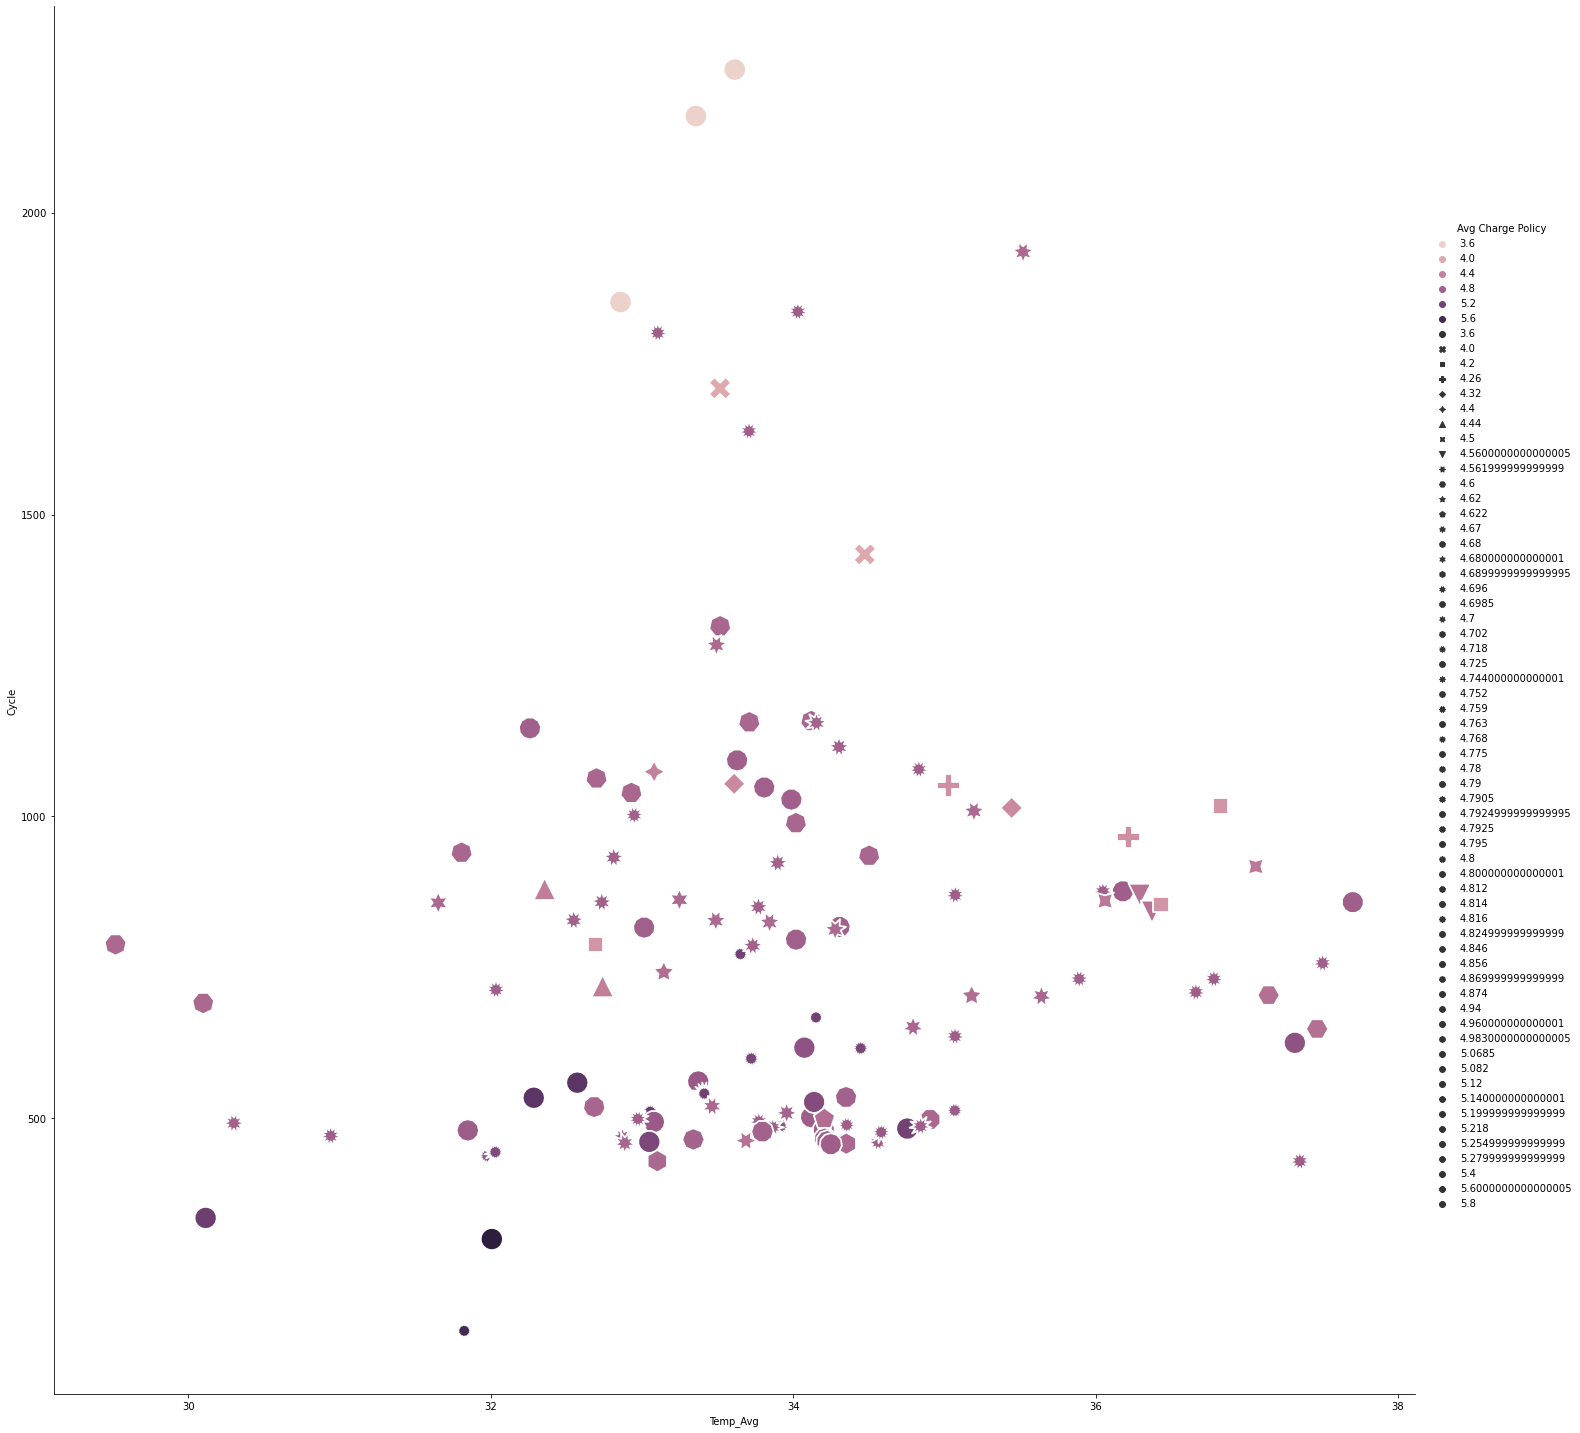

In [20]:
sns.relplot(x=plot["Temp_Avg"], y=plot["Cycle"],
            hue=plot["Avg Charge Policy"],data=plot,style =plot["Avg Charge Policy"],height=20,s=500);
plt.savefig("temp_avg_charge_policy.jpg")

In [18]:
plot.nunique()

Cell_No              124
Charge_Policy         68
Variance(Qdlin)      124
Cycle                114
log(Variance)        124
harge_Poliy           18
Unnamed: 6            38
Unnamed: 7            18
Unnamed: 8            38
Avg Charge Policy     59
Temp_Avg             124
dtype: int64

In [ ]:
plot['']

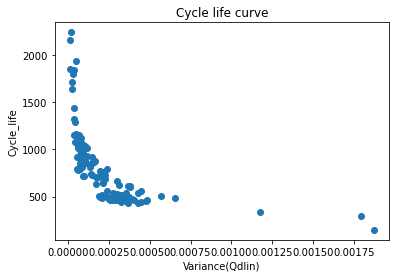

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter((plot['Variance(Qdlin)']),plot['Cycle'])
plt.xlabel('Variance(Qdlin)')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve')
plt.show()

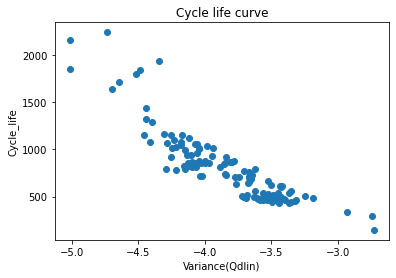

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter((plot['log(Variance)']),plot['Cycle'])
plt.xlabel('Variance(Qdlin)')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve')
plt.show()

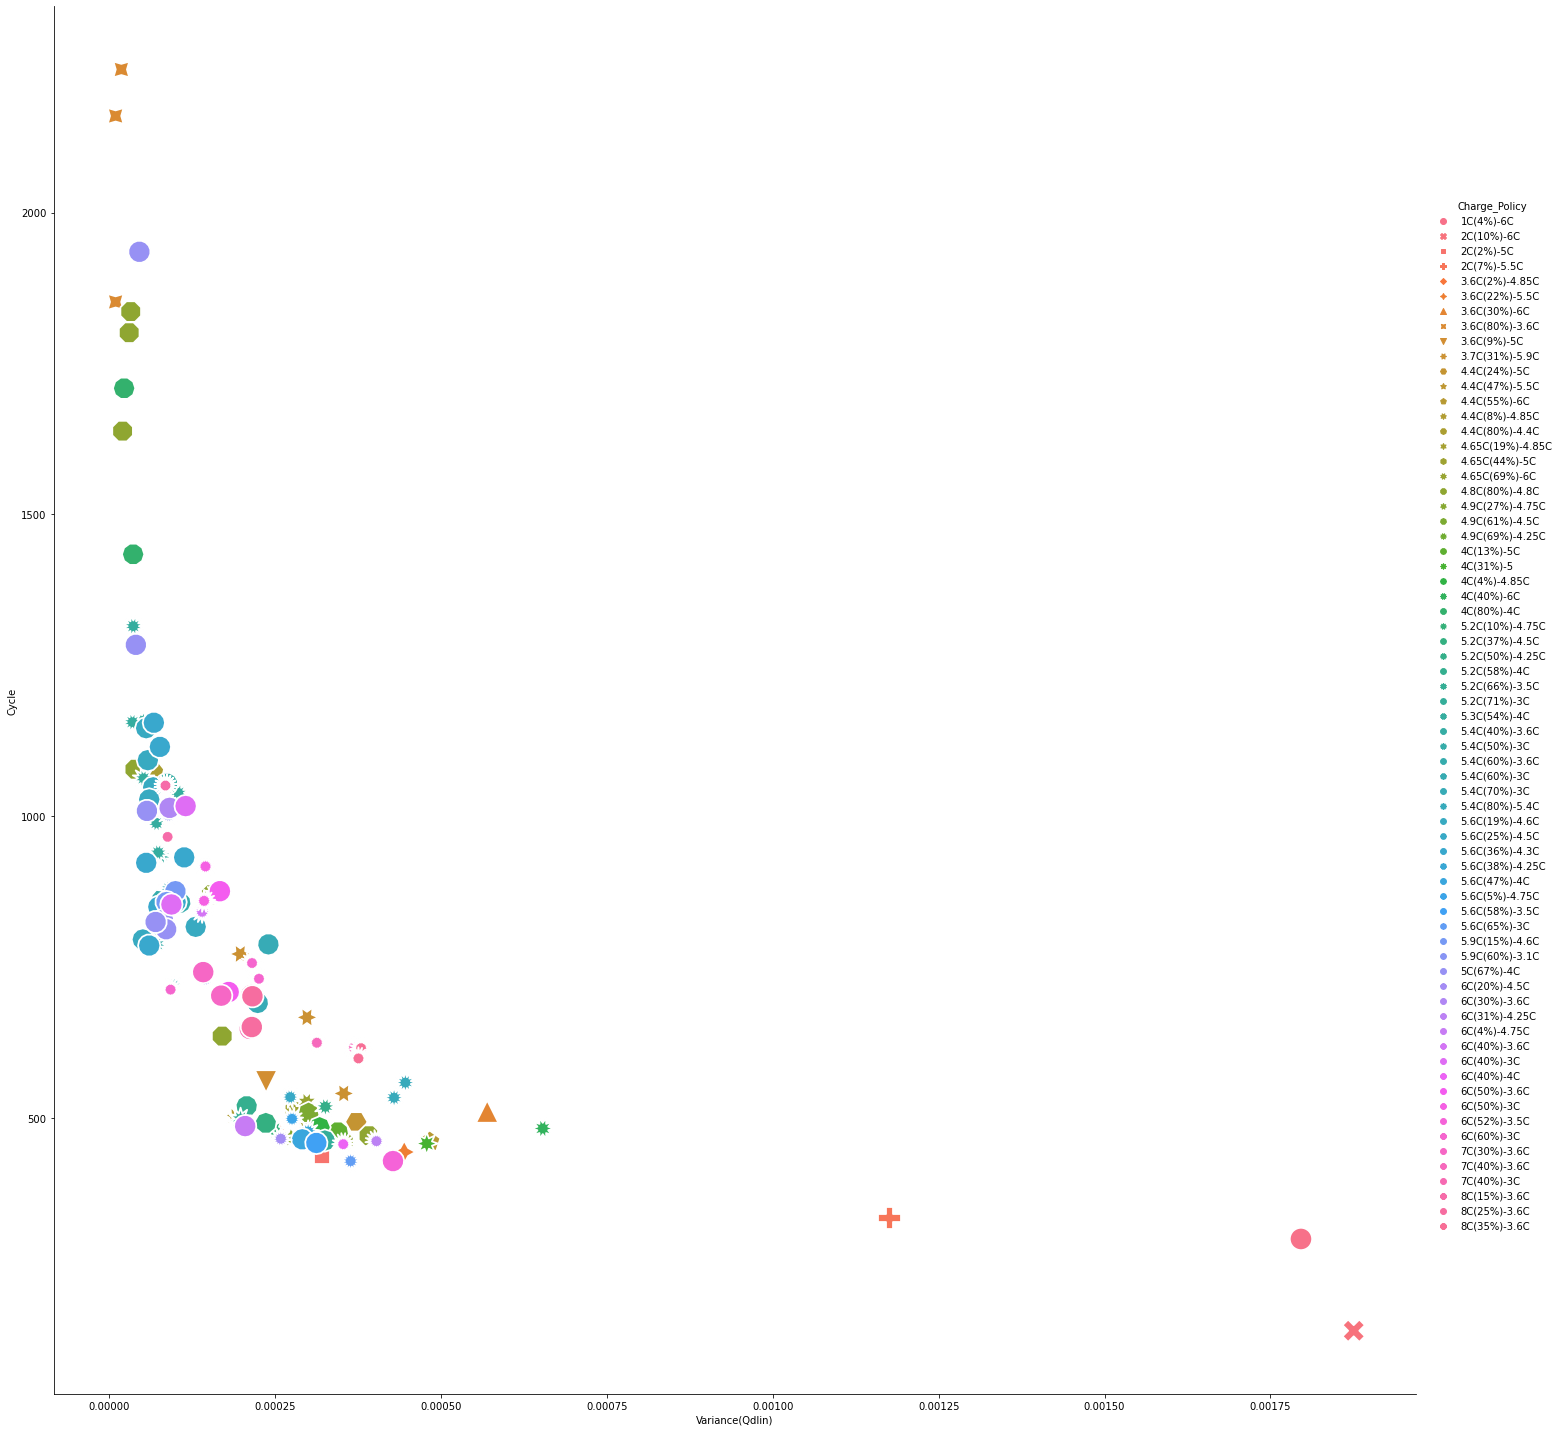

In [8]:
sns.relplot(x=plot["Variance(Qdlin)"], y=plot["Cycle"],
            hue=plot["Charge_Policy"],data=plot,style =plot["Charge_Policy"],height=20,s=500);
plt.savefig("output.jpg")

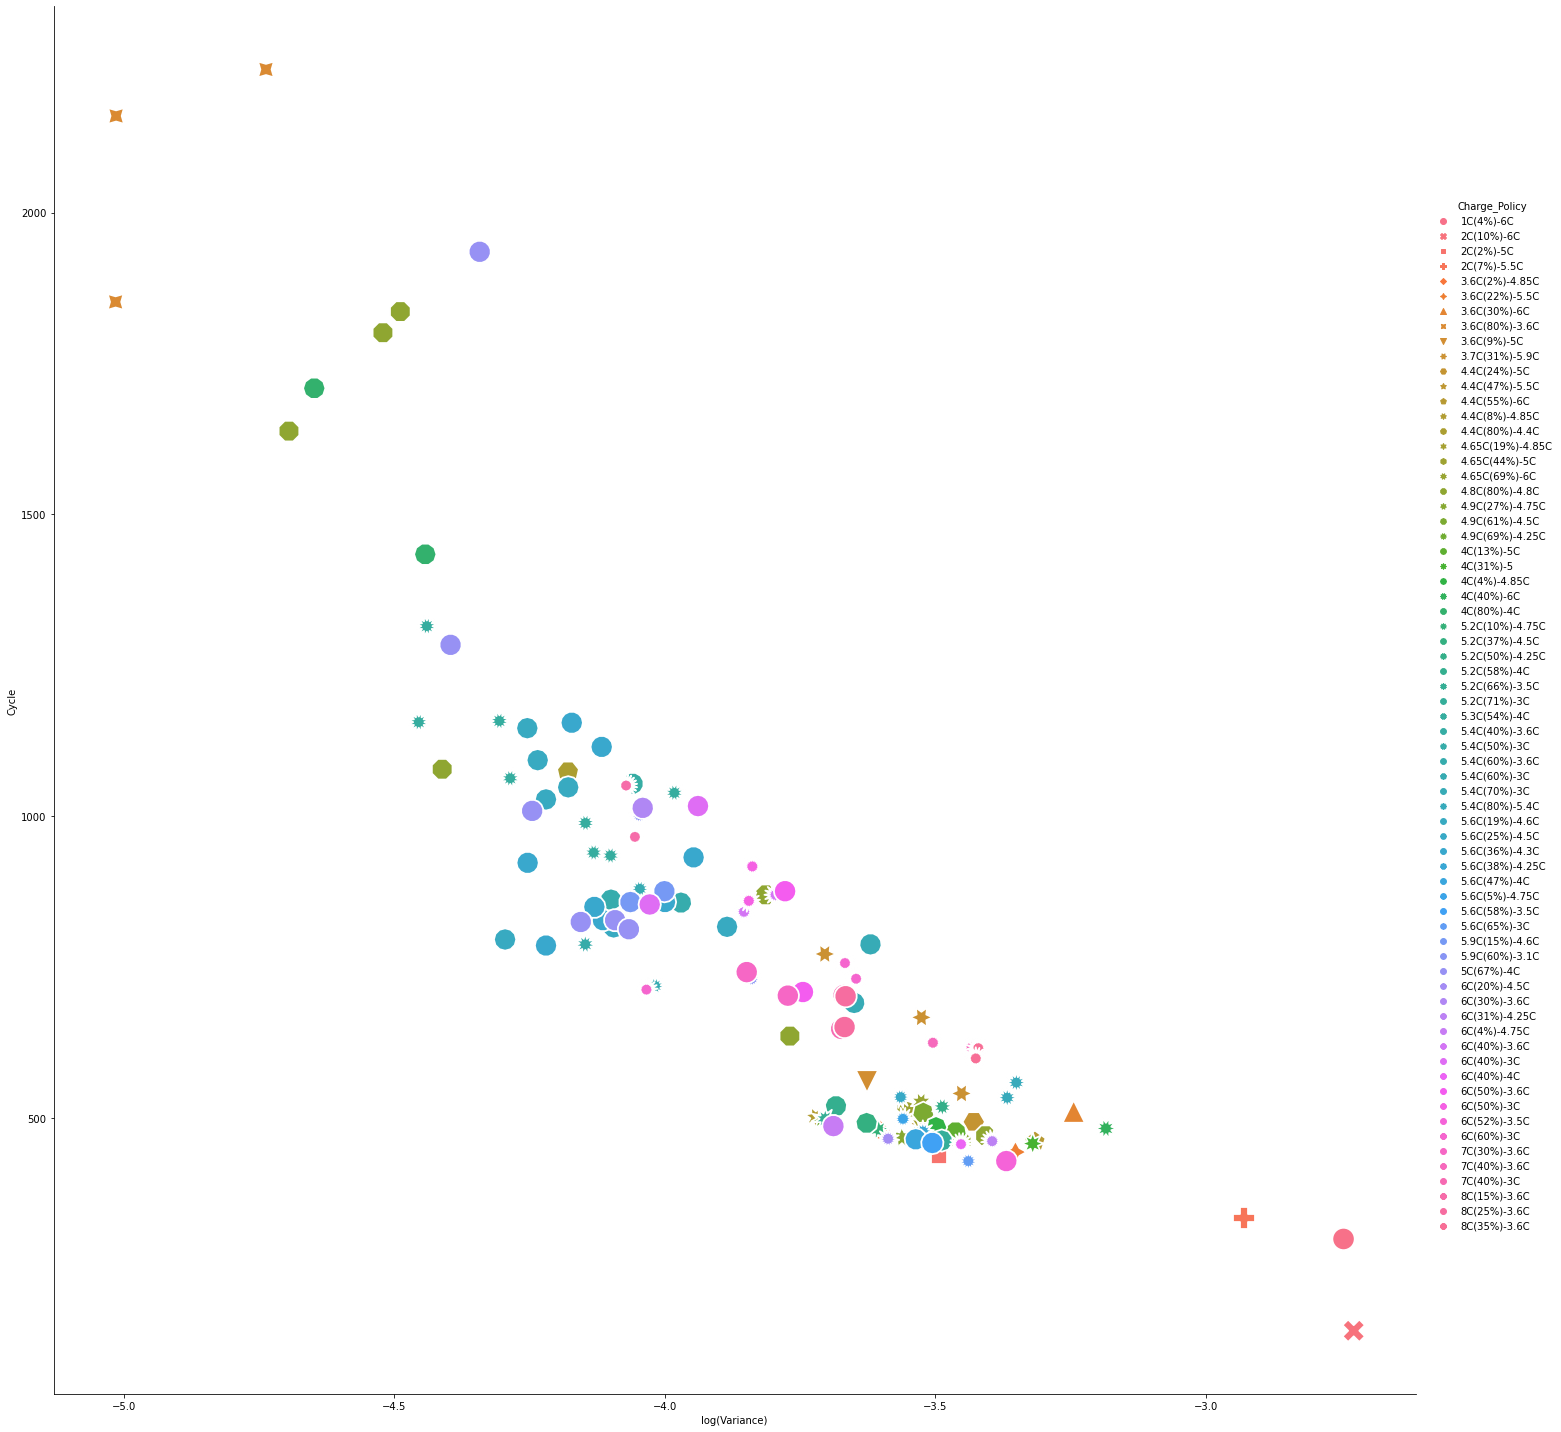

In [9]:
sns.relplot(x=plot["log(Variance)"], y=plot["Cycle"],
            hue=plot["Charge_Policy"],data=plot,style =plot["Charge_Policy"],height=20,s=500);
plt.savefig("output_log.jpg")

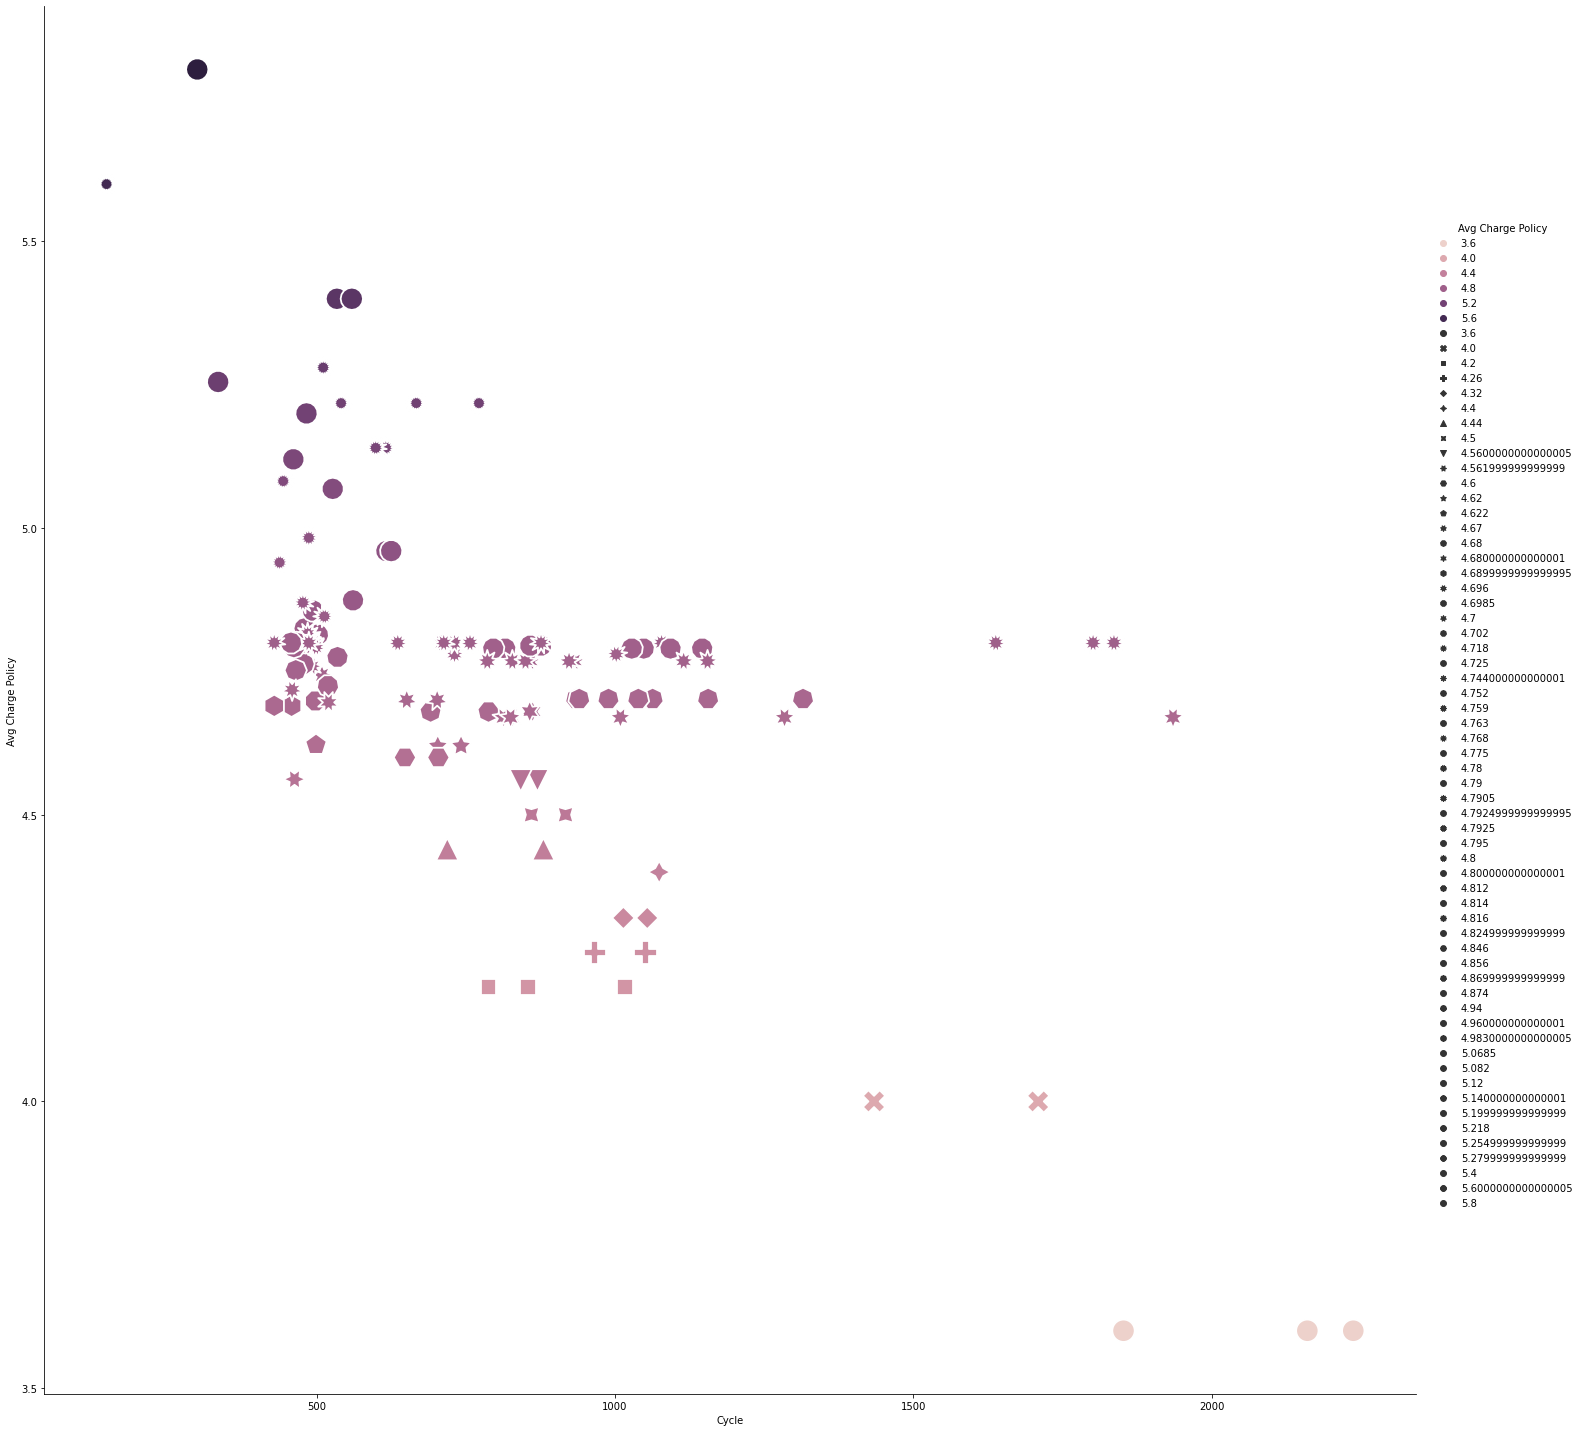

In [10]:
sns.color_palette("viridis", as_cmap=True)
sns.relplot(x=plot["Cycle"], y=plot["Avg Charge Policy"],hue=plot["Avg Charge Policy"],
            data=plot,style =plot["Avg Charge Policy"],height=20,s=500);
#plt.savefig("Avg_Charge_Policy.jpg")

# plt.scatter((plot['Avg Charge Policy']),plot['Cycle'])
# plt.xlabel('Avg Charge Policy')
# plt.ylabel('Cycle_life')
# plt.title('Avg Charge Policy Curve')
# plt.show()

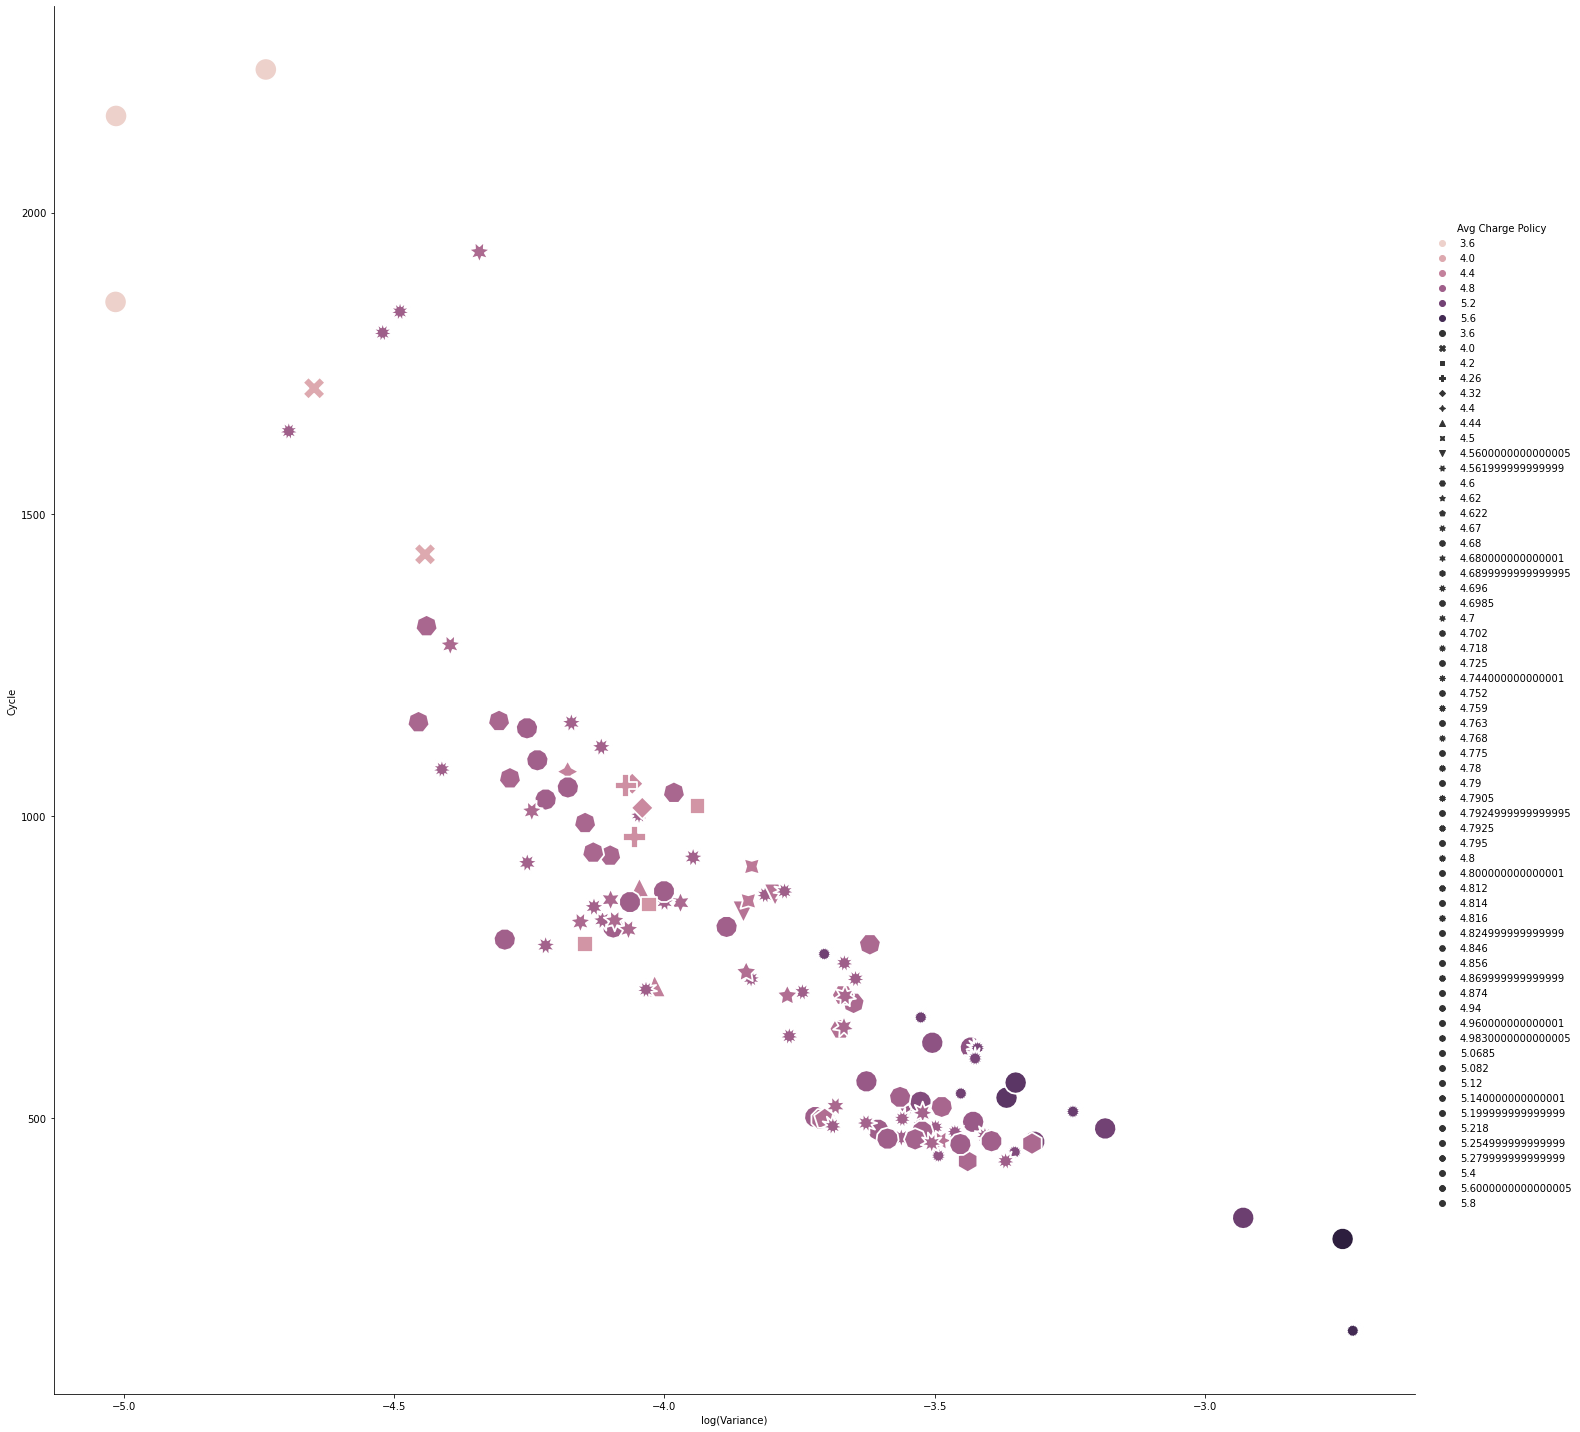

In [11]:
sns.relplot(x=plot["log(Variance)"], y=plot["Cycle"],
            hue=plot["Avg Charge Policy"],data=plot,style =plot["Avg Charge Policy"],height=20,s=500);
plt.savefig("Avg_Charge_Policy_variance.jpg")
#plt.savefig("output_log.jpg")

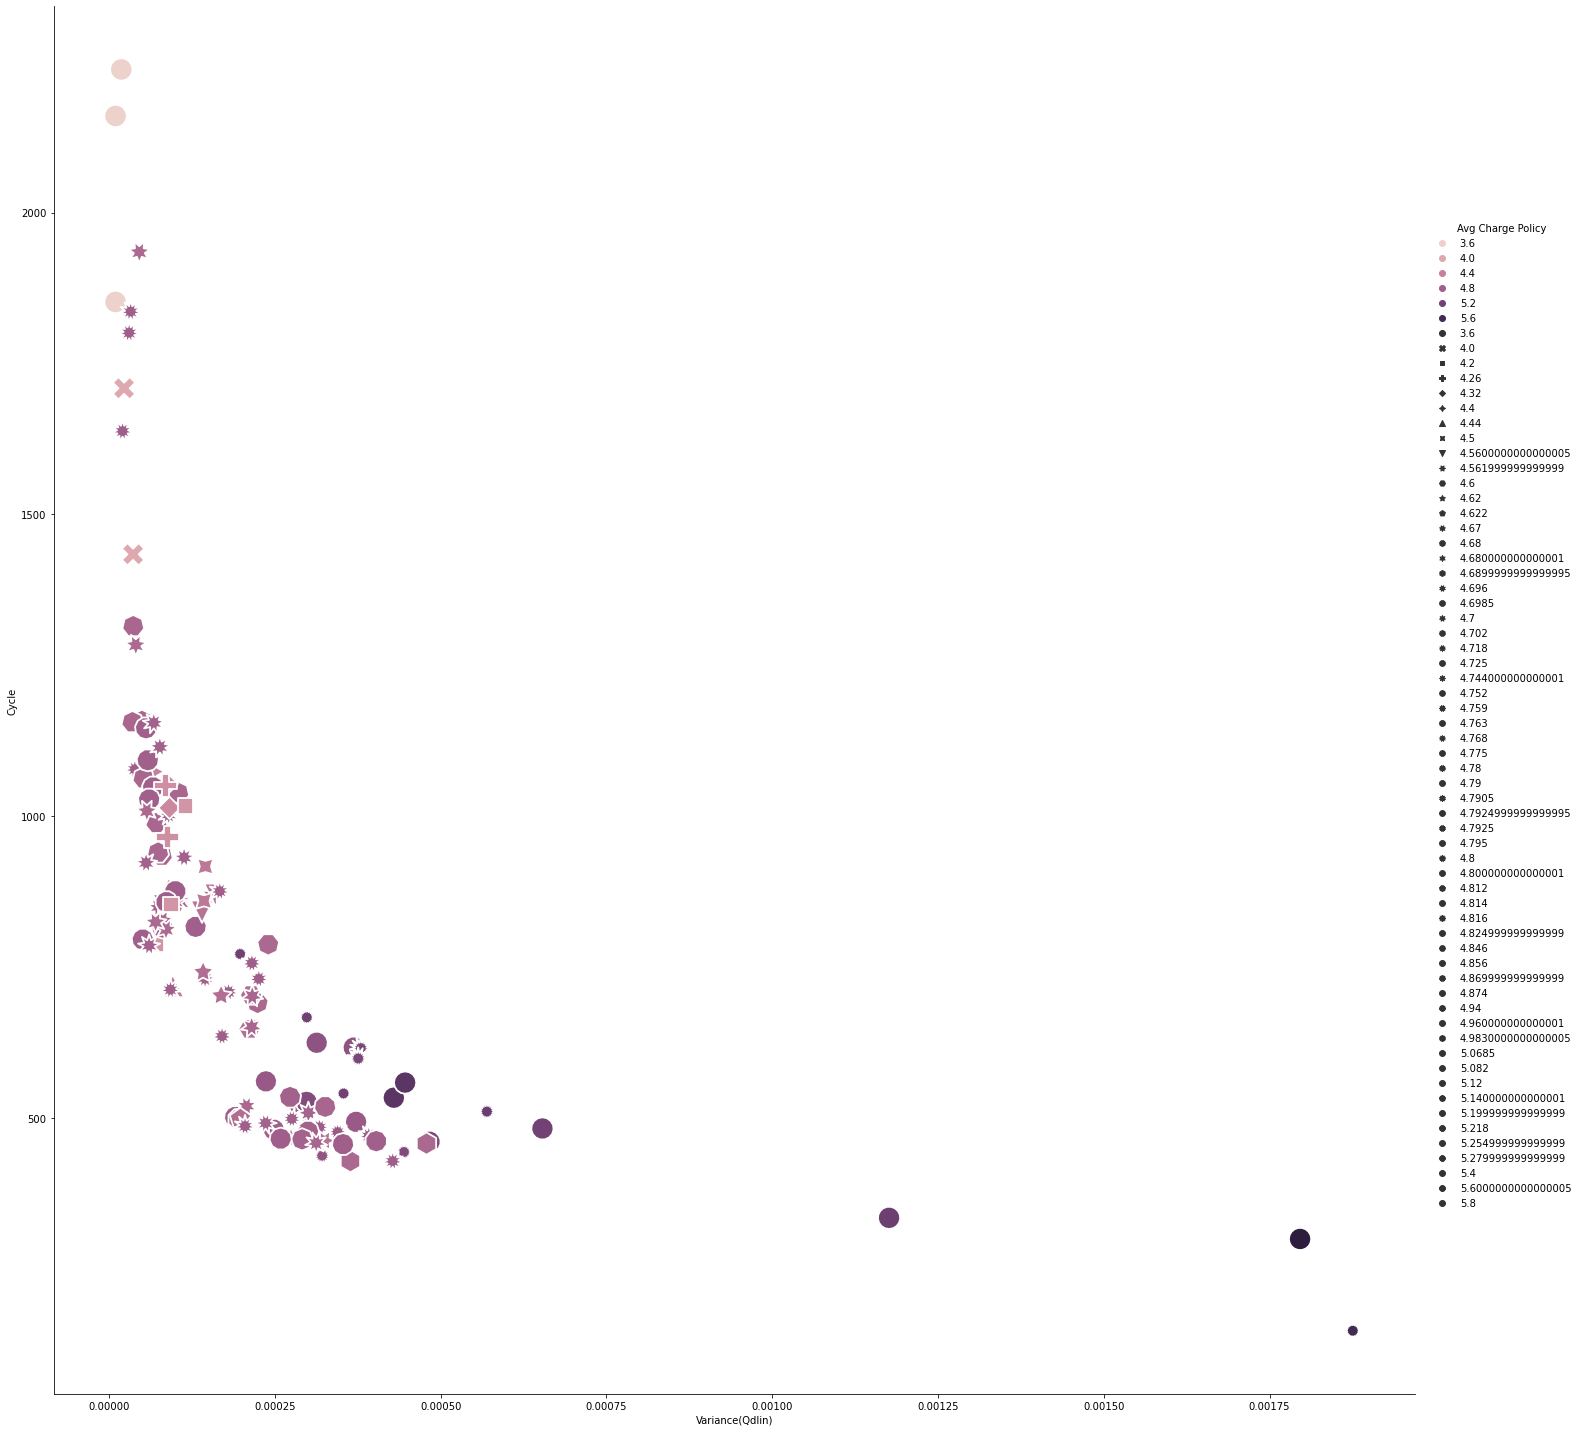

In [12]:
sns.relplot(x=plot["Variance(Qdlin)"], y=plot["Cycle"],
            hue=plot["Avg Charge Policy"],data=plot,style =plot["Avg Charge Policy"],height=20,s=500);
plt.savefig("Avg_Charge_Policy_log_variance.jpg")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


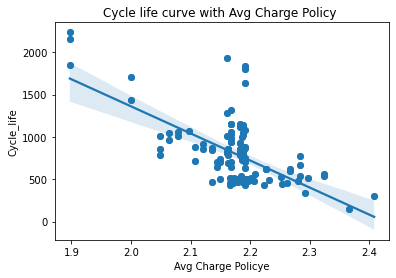

In [13]:
plt.scatter((np.sqrt(plot["Avg Charge Policy"])),plot["Cycle"])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((np.sqrt(plot["Avg Charge Policy"])),plot["Cycle"])
plt.xlabel('Avg Charge Policye')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve with Avg Charge Policy ')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


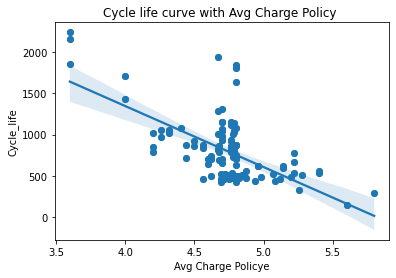

In [14]:
plt.scatter((plot["Avg Charge Policy"]),plot["Cycle"])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((plot["Avg Charge Policy"]),plot["Cycle"])
plt.xlabel('Avg Charge Policye')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve with Avg Charge Policy ')
plt.show()

In [25]:
#Function to extract data cycle wise for each cell
#insert the cell no and cycle number to extract the data
#cell no varies from b1c0 to b3c43 and cycle number varies from 0 to 2300
def cycle(df):
    import pandas as pd
    cell_no = input("Enter the cell no.:")
    Index = int(input("Enter the index value:"))
    df1 = df.transpose()
    df2 = pd.DataFrame(df1['cycles'][cell_no])
    df3 = df2.transpose()
    df4 = pd.DataFrame()#df3['I'][Index],columns= ['I'])
    for i in list(df3):
        df5 = pd.DataFrame(df3[i][Index],columns = [i])
        df6 = df4.transpose()
        df7 = df6.append(df5.transpose())
        df4 = df7.transpose()
        df4.to_csv('C:\\Users\\satsin\\Desktop\\Battery life\\Cycle_'+str(cell_no)+'_'+str(Index)+'.csv')
    return(df4.shape)

In [ ]:
cycle(train)

In [ ]:
#function to extract all the data for different batches in different sheet cell wise for summary data
#Create one excel file in the shared location to save all the records and run the script in append mode,'a'
def summary(df):
    for i in list(df):
        cell = pd.DataFrame(df[i])
        cell_1 = cell.transpose()
        df3 = pd.DataFrame(cell_1['summary'][i])
        s_name = 'C:\\Users\\satsin\\Desktop\\Battery life\\summary_batch2.xlsx'
        with pd.ExcelWriter(s_name,engine="openpyxl",mode='a') as writer:
            d_name='Sheet_'+str(i)
            df3.to_excel(writer, sheet_name=d_name)
    return df3.shape

In [ ]:
summary(df)

In [ ]:
#function to extract all the data for different batches in different sheet cell wise for cycle data
#Create one excel file in the shared location to save all the records and run the script in append mode,'a'

def cycle_1(df):
    for i in list(df):
        cell = pd.DataFrame(df[i])
        cell_1 = cell.transpose()
        cell_2 = pd.DataFrame.from_dict({(j,k): cell_1['cycles'][j][k] 
                           for j in cell_1['cycles'].keys() 
                           for k in cell_1['cycles'][i].keys()},
                       orient='index')
        s_name = 'C:\\Users\\satsin\\Desktop\\Battery life\\extracted files\\Cycle_batch2.xlsx'
        with pd.ExcelWriter(s_name,engine="openpyxl",mode='a') as writer:
            d_name='Sheet_'+str(i)
            cell_2.to_excel(writer, sheet_name=d_name)
        
        #print(cell_3)
        
    return cell_2.shape

In [ ]:
cycle_1(df)